In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
grip_thinning = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP/thinning.txt', sep='\t', comment = '#')
ngrip_thinning = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP/thinning.txt', sep='\t', comment = '#')

load_gicc05 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC05_time_scale.tab', sep='\t', comment = '#', skiprows=40)

grip_accumulation = pd.DataFrame()
#take the thickness of each year first
grip_accumulation['thick'] = load_gicc05['Depth ice/snow [m] (GRIP)'].diff() # Calculate annual layer thickness
grip_accumulation['depth']= load_gicc05['Depth ice/snow [m] (GRIP)'] # Depth in meters
grip_accumulation.dropna(inplace=True)  # Remove NaN values resulting from diff()

grip_accumulation = grip_accumulation.dropna(subset=['thick']) # Ensure no NaN values in 'thick' column


#get density 
grip_density = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GRIP/density.txt', sep='\t', comment = '#')
grip_density

,depth,rel_dens
0,0.000000,0.352574
1,0.203704,0.356241
2,0.407407,0.359908
3,0.611111,0.363575
4,0.814815,0.367242
...,...,...
15396,3080.254001,1.000000
15397,3080.454071,1.000000
15398,3080.654141,1.000000
15399,3080.854210,1.000000


In [45]:
load_gicc05 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC05_time_scale.tab', sep='\t', comment = '#', skiprows=40)
load_gicc05['Depth ice/snow [m] (GRIP)'].max()

1624.27

Text(0.5, 1.0, 'GRIP Accumulation Rate vs Depth')

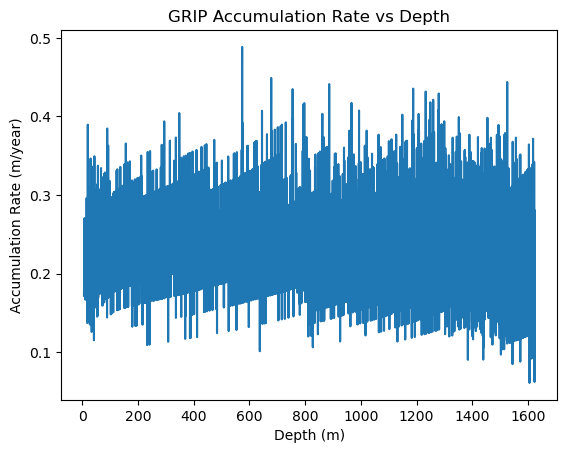

In [46]:
# acc = thickness / thinning factor
grip_accumulation['thinning'] = np.interp(grip_accumulation['depth'], grip_thinning['depth'], grip_thinning['thinning']) # Interpolate thinning factors to match depths
grip_accumulation['density'] = np.interp(grip_accumulation['depth'], grip_density['depth'], grip_density['rel_dens']) # Interpolate density to match depths

grip_accumulation['accumulation'] = (grip_accumulation['thick'] / grip_accumulation['thinning']) * grip_accumulation['density'] # Calculate accumulation rate

plt.plot(grip_accumulation['depth'], grip_accumulation['accumulation']) # Plot accumulation rate vs depth
plt.xlabel('Depth (m)')
plt.ylabel('Accumulation Rate (m/year)')
plt.title('GRIP Accumulation Rate vs Depth')



In [47]:
#this is a calculation of accumulation using NGRIP-GRIP tie points, next section is using the d18O from the gicc05 match points file

# ngrip_grip_ties = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP-GRIP/iceice_synchro_horizons.txt', sep='\t', comment = '#', skiprows=1, names=['NGRIP', 'GRIP', "unc"])
# ngrip_grip_ties = ngrip_grip_ties.where(ngrip_grip_ties['GRIP'] > grip_accumulation['depth'].max()).dropna() # Drop rows where GRIP is not greater than max depth

# ngrip_grip_ties = ngrip_grip_ties.where(ngrip_grip_ties['NGRIP'] < load_gicc05['Depth ice/snow [m] (NGRIP2)'].max()).dropna() # Drop rows where GRIP is not greater than max depth

# #get associated NGRIP ages with GICC05
# #NGRIP1 max is 1371 so this is all NGRIP2.
# gicc05 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC05_time_scale.tab', sep='\t', comment = '#', skiprows=40)

# gicc05.dropna(inplace=True, subset=['Depth ice/snow [m] (NGRIP2)', 'Age [a] (b2k)']) # Ensure no NaN values in relevant columns
# gicc05_interp = gicc05[['Age [a] (b2k)', 'Depth ice/snow [m] (NGRIP2)']]

# ngrip_grip_ties['GICC05_age'] = np.interp(ngrip_grip_ties['NGRIP'], gicc05_interp['Depth ice/snow [m] (NGRIP2)'], gicc05_interp['Age [a] (b2k)'])

# ngrip_grip_ties['time_diff'] = ngrip_grip_ties['GICC05_age'].diff().abs() # Calculate time differences between consecutive ties
# ngrip_grip_ties['depth_diff'] = ngrip_grip_ties['GRIP'].diff().abs() # Calculate depth differences between consecutive ties

# ngrip_grip_ties['annual_thickness'] = ngrip_grip_ties['depth_diff'] / ngrip_grip_ties['time_diff'] # Calculate annual layer thickness
# ngrip_grip_ties = ngrip_grip_ties.dropna(subset=['annual_thickness']) # Ensure no NaN values in 'annual_thickness' column

# grip_accumulation2 = ngrip_grip_ties[['annual_thickness']].copy(deep=True)
# grip_accumulation2['depth'] = ngrip_grip_ties['GRIP'] # Depth in meters
# grip_accumulation2['thinning'] = np.interp(grip_accumulation2['depth'], grip_thinning['depth'], grip_thinning['thinning']) # Interpolate thinning factors to match depths

# grip_accumulation2['deporate'] = grip_accumulation2['annual_thickness'] / grip_accumulation2['thinning'] # Calculate accumulation rate
# grip_accumulation_export2 = grip_accumulation2[['depth', 'deporate']]
# grip_accumulation_export2['rel_unc'] = grip_accumulation_export2['deporate'] * 0.15
# grip_accumulation_export2['comment'] = np.nan

# grip_accumulation_export2

         depth       age  mce  time_diff  depth_diff  thinning   density  \
19        5.50      20.2  1.0        NaN         NaN  0.999016  0.451587   
21        6.05      21.6  1.0        1.4        0.55  0.997049  0.461489   
23        6.60      22.9  1.0        1.3        0.55  1.000000  0.471390   
25        7.15      24.0  1.0        1.1        0.55  0.996463  0.481291   
27        7.70      25.0  1.0        1.0        0.55  0.999424  0.491193   
...        ...       ...  ...        ...         ...       ...       ...   
9995   2748.90  103551.0  NaN       98.0        0.55  0.025067  1.000000   
9997   2749.45  103648.0  NaN       97.0        0.55  0.025023  1.000000   
9999   2750.00  103744.0  NaN       96.0        0.55  0.024878  1.000000   
10001  2750.55  103840.0  NaN       96.0        0.55  0.024808  1.000000   
10003  2751.10  103938.0  NaN       98.0        0.55  0.024703  1.000000   

       annual_thickness  accumulation  
19                  NaN           NaN  
21     

Text(0.5, 1.0, 'GRIP Accumulation Rate vs Age')

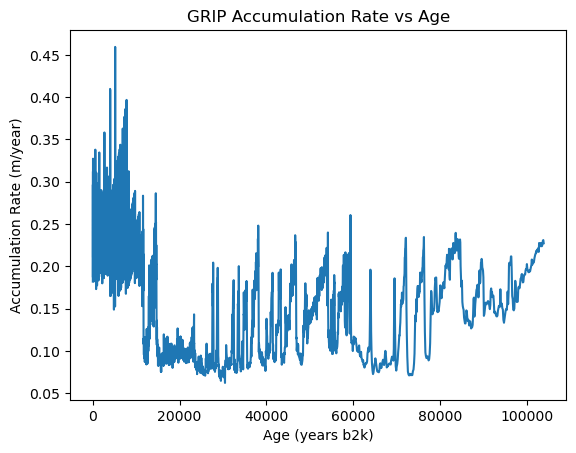

In [51]:
grip_extended_chronology = pd.read_excel('/Users/quinnmackay/Documents/GitHub/BICC/Data Storage/Chronologies/GICC05 match points and d18O and CH4.xlsx', sheet_name=4, skiprows=21, usecols=[1,2,3], names=['depth', 'age', 'mce'])

grip_extended_chronology.dropna(inplace=True, subset=['depth', 'age']) # Ensure no NaN values in relevant columns

grip_extended_chronology['time_diff'] = grip_extended_chronology['age'].diff().abs() # Calculate time differences between consecutive ties
grip_extended_chronology['depth_diff'] = grip_extended_chronology['depth'].diff().abs() # Calculate depth differences between consecutive ties

grip_extended_chronology = grip_extended_chronology.drop_duplicates(subset=['depth', 'age'])

grip_extended_chronology['thinning'] = np.interp(grip_extended_chronology['depth'], grip_thinning['depth'], grip_thinning['thinning']) # Interpolate thinning factors to match depths
grip_extended_chronology['density'] = np.interp(grip_extended_chronology['depth'], grip_density['depth'], grip_density['rel_dens']) # Interpolate density to match depths

grip_extended_chronology['annual_thickness'] = grip_extended_chronology['depth_diff'] / grip_extended_chronology['time_diff'] # Calculate annual layer thickness

grip_extended_chronology['accumulation'] = (grip_extended_chronology['annual_thickness'] / grip_extended_chronology['thinning']) * grip_extended_chronology['density'] # Calculate accumulation rate

print(grip_extended_chronology)

plt.plot(grip_extended_chronology['age'], grip_extended_chronology['accumulation']) # Plot accumulation rate vs age
plt.xlabel('Age (years b2k)')
plt.ylabel('Accumulation Rate (m/year)')
plt.title('GRIP Accumulation Rate vs Age')
#plt.xlim(1000,1200)


In [54]:
grip_extended_chronology.rename(columns={
    'accumulation': 'deporate'
}, inplace=True)

grip_extended_chronology['rel_unc'] = grip_extended_chronology['deporate'] * 0.15  # 15% relative uncertainty

grip_extended_chronology['comment'] = np.nan

grip_extended_chronology_export = grip_extended_chronology[['depth', 'deporate', 'rel_unc', 'comment']]

grip_extended_chronology_export = grip_extended_chronology_export[1:]

grip_extended_chronology_export.to_csv('/Users/quinnmackay/Desktop/temp/deporate.txt', sep='\t', index=False)

In [49]:
grip_accumulation.rename(columns={
    'accumulation': 'deporate'
}, inplace=True)

grip_accumulation['rel_unc'] = grip_accumulation['deporate'] * 0.15  # 15% relative uncertainty

grip_accumulation['comment'] = np.nan

grip_accumulation_export = grip_accumulation[['depth', 'deporate', 'rel_unc', 'comment']]

grip_accumulation_export_3 = pd.concat([grip_accumulation_export, grip_accumulation_export2], ignore_index=True)

grip_accumulation_export_3

,depth,deporate,rel_unc,comment
0,5.800,0.171724,0.025759,NaN
1,6.200,0.186075,0.027911,NaN
2,6.625,0.200564,0.030085,NaN
3,7.175,0.265862,0.039879,NaN
4,7.725,0.270570,0.040585,NaN
...,...,...,...,...
12048,2475.174,0.226204,0.033931,NaN
12049,2476.001,0.237788,0.035668,NaN
12050,2478.222,0.120140,0.018021,NaN
12051,2478.420,0.111854,0.016778,NaN


In [50]:
grip_accumulation_export_3.to_csv('/Users/quinnmackay/Desktop/temp/deporate.txt', sep='\t', index=False)